Problema 1: Medida da resistência de um resistor R usando um ohmímetro com ruído gaussiano

medida = resistor + ruído gaussiano

escrever FK que gere a estimativa de R após cada medida gerado pelo instrumento:

Dica: Usar FK com apenas atualização

Equação de medida: z(k) = x(k) + v(k)

v(k) = ruído gaussiano com média zero e desvio padrão D

Dados: x^(0) = 100 (estimativa inicial)

P(0) = 300 (variância do erro inicial, incerteza da estimativa inicial)

R = 85 (valor verdadeiro de x(k))

D = 5 (desvio padrão do ruído de medida)


31.622776601683793
16.90332654824319
12.911369649234105
10.849663841382498
9.539887835830898
8.614351364468117
7.91617186298372
7.365645845338675
6.917419863177691
6.543533825905118
6.2256874521119725
5.951332838943857
5.711540074775186
5.499757320722396
5.311053629081407
5.141637024354415
4.988536896113914
4.8493883488721465
4.722281955275161
4.605656691865326
4.498222115976324
4.398900790618361
4.306785011760096
4.2211038200162605
4.141197527369426
4.066497815878184
3.996512022882947
3.930810610121796
3.8690170813919402
3.810799802658543
3.75586531439788
3.70395282475384
3.654829644750854
3.6082873808331493
3.5641387405761304
3.5222148381772937
3.482362909861264
3.444444367476756
3.408333132663583
3.373914205006398
3.3410824262933847
3.3097414099020854
3.2798026098462825
3.2511845084438216
3.2238119051391516
3.1976152919154655
3.1725303030981316
3.148497229291291
3.1254605867872156
3.103368735109463
3.082173536448399
3.0618300516627963
3.0422962682872736
3.023532856628874
3.005502950

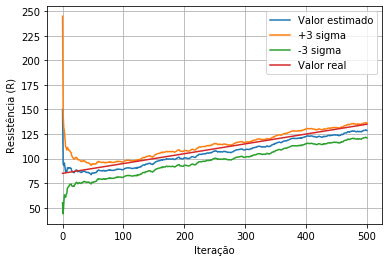

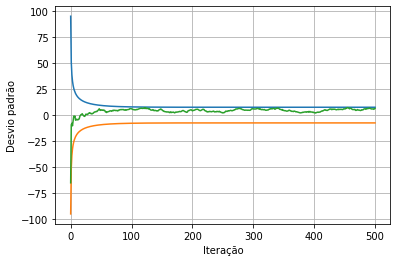

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_real = 85
x = []
P = []
z = []
x_real_list = []

x.append(150)
P.append(1000) # Variância do erro inicial, incerteza da estimativa inicial. 
x_real_list.append(x_real)
D_mod = 2
D_med = 20 # Desvio padrão do ruído de medida.

imax = 500
i = 0

Q = .1
R = D_med**2


# Equação de medida z(k) = x(k) + v(k)
while(i < imax):
    i = i+1
    
    x_real = x_real + .1
    x_real_list.append(x_real)
    x_pred = x[-1] #+ np.random.normal(0,D_mod,1)
    P_pred = P[-1] + Q

    # Medição
    z.append(x_real + np.random.normal(0,D_med,1))
    Kt = P_pred*1*(1*P_pred*1+R)**(-1)
    print(np.sqrt(P[-1]))

    x.append(x_pred + Kt*(z[-1]-1*x_pred))
    P.append((1-Kt*1)*P_pred)
    
    
plt.plot(x, label="Valor estimado")
plt.plot(x+3*np.sqrt(P), label="+3 sigma")
plt.plot(x-3*np.sqrt(P), label="-3 sigma")
plt.plot(x_real_list, label="Valor real")
plt.legend(loc="upper right")
plt.xlabel('Iteração')
plt.ylabel('Resistência (R)')
plt.grid(True)
plt.show()

plt.plot(3*np.sqrt(P))
plt.plot(-3*np.sqrt(P))
plt.plot(np.array(x_real_list)-np.array(x))
plt.xlabel('Iteração')
plt.ylabel('Desvio padrão')
plt.grid(True)
plt.show()

Problema 2: Massa M onde é aplicada uma força conhecida com deslocamento em uma linha horizontal

Posição da massa M é medida por sensor com adição de ruído gaussiano de média zero e desvio padrão D

Escrever: Equação de movimento e Equação de Medida, Aplicar FK

Equação de movimento:

x(1) = posição

x(2) = velocidade

u(t) = Força aplicacda

w(t) = ruído na aceleração

dx(1)/dt = x(2)

dx(2)/dt = u(t)/M + w(t)

Equação de medida: z(t) = x(1) + v(t)

Modelo de simulação do sistema real gera z(t)

FK como estimador do estado x(t) e calcula P(t)

[[25  0]
 [ 0 25]]


<IPython.core.display.Javascript object>


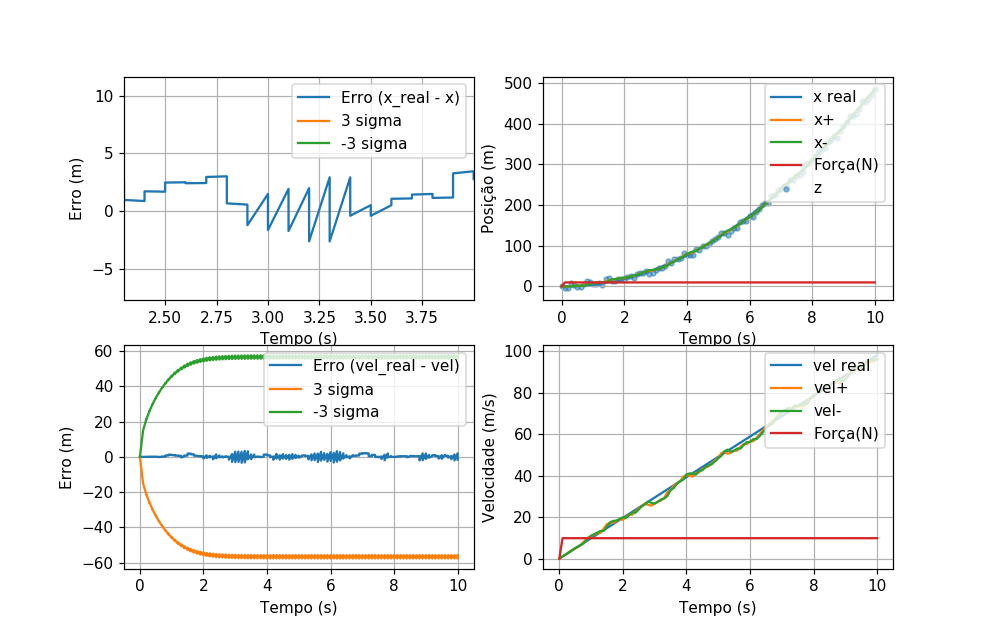

In [1]:
%matplotlib notebook
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))


def rodaFiltro(modo = 0):
    t_ = []
    x_p = []
    x_m = []
    x_real_ = []
    z_ = []
    vel_p = []
    vel_m = []
    vel_real_ = []
    P_x = []
    P_vel = []
    x_ = []
    vel_ = []
    erro_vel_ = []
    erro_x_ = []
    i_ = []
    f_ = []


    M = 1  # kg
    D_tra = 2 # Desvio padrão do ruído de transição
    D_obs = 5 # Desvio padrão do ruído de observação

    x_real = np.array([[0],[0]])

    x = np.array([[0],[0]])
    P = covariance2d(0, 0)
    z = np.array([])

    imax = 100
    i = 0
    dt = 0.1

    R = covariance2d(D_obs, D_obs)
    print(R)
    Q = D_obs*D_obs*20


    Ac = np.array([[0,1],[0,0]])
    Bc = np.array([[0], [1/M]])
    Cc = np.array([[1, 0]])
    Dc = 0

    sys = ss(Ac, Bc, Cc, Dc)
    d_sys = c2d(sys, dt)
    A = d_sys.A
    B = d_sys.B
    C = d_sys.C
    D = d_sys.D
    
    P_x.append(np.sqrt(P[0,0]))
    P_vel.append(np.sqrt(P[1,1]))
    x_.append(x[0,0])
    vel_.append(x[1,0])
    erro_x_.append(abs(x[0,0] - x_real[0,0]))
    erro_vel_.append(abs(x[1,0] - x_real[1,0]))
    i_.append(0) 
    x_p.append(x[0,0])
    x_m.append(x[0,0])
    x_real_.append(x_real[0,0])
    z_.append(0)
    vel_p.append(x[1,0])
    vel_m.append(x[1,0])
    vel_real_.append(x_real[1,0])
    t_.append(0)
    f_.append(0)

    # Equação de medida z(k) = x(k) + v(k)
    while(i < imax):
        i = i+1
        
        if modo == 0:
            F = 9.8 # N
        elif(modo == 1):
            if (int(i*dt)%2)==0:
                F = 9.8
            else:
                F = -9.8
        else:
            if (int(i*dt)%2)==0:
                F = 9.8*(i*dt%2) - 9.8/2
            else:
                F = 9.8*(-i*dt%2) - 9.8/2

        # Atualiza a física do sistema
        x_real = np.asarray([[x_real[0][0]+x_real[1][0]*dt] , [x_real[1][0]+(F/M)*dt]])
        ruido_observacao = np.random.normal(0,D_obs,1)

        # Faz medição
        z = x_real[0][0] + ruido_observacao

        # Propagação
        x_pred = A @ x + B * F
        P_pred = A @ P @ A.T + R

        # Atualização
        K = P_pred @ C.T @ np.linalg.inv(C @ P_pred @ C.T + Q)
        x = x_pred + K @ (z - C @ x_pred)
        P = (np.identity(len(K)) - K @ C) @ P_pred


        ## Armazena variáveis
        P_x.append(np.sqrt(P_pred[0,0]))
        P_vel.append(np.sqrt(P_pred[1,1]))
        x_.append(x_pred[0,0])
        vel_.append(x_pred[1,0])
        erro_x_.append(abs(x_pred[0,0] - x_real[0,0]))
        erro_vel_.append(abs(x_pred[1,0] - x_real[1,0]))
        i_.append(dt*i)
        i_.append(dt*i)
        P_x.append(np.sqrt(P[0,0]))
        P_vel.append(np.sqrt(P[1,1]))
        x_.append(x[0,0])
        vel_.append(x[1,0])
        erro_x_.append(x[0,0] - x_real[0,0])
        erro_vel_.append(x[1,0] - x_real[1,0])
        x_p.append(x[0,0])
        x_m.append(x_pred[0,0])
        x_real_.append(x_real[0,0])
        z_.append(z)
        vel_p.append(x[1,0])
        vel_m.append(x_pred[1,0])
        vel_real_.append(x_real[1,0])
        t_.append(i*dt)
        f_.append(F)


    fig, axs = plt.subplots(2, 2)

    axs[0, 0].plot(i_,erro_x_, label="Erro (x_real - x)")
    axs[0, 0].plot(i_,-3*np.asarray(P_x), label="3 sigma")
    axs[0, 0].plot(i_,3*np.asarray(P_x), label="-3 sigma")
    axs[0, 0].set_xlabel('Tempo (s)')
    axs[0, 0].set_ylabel('Erro (m)')
    axs[0, 0].legend(loc="upper right")
    axs[0, 0].grid(True)

    axs[0, 1].plot(t_, x_real_, label="x real")
    axs[0, 1].plot(t_, x_p, label="x+")
    axs[0, 1].plot(t_, x_m, label="x-")
    axs[0, 1].plot(t_, f_, label="Força(N)")
    axs[0, 1].scatter(t_, z_, label="z", alpha=0.5, s=10)
    axs[0, 1].set_xlabel('Tempo (s)')
    axs[0, 1].set_ylabel('Posição (m)')
    axs[0, 1].legend(loc="upper right")
    axs[0, 1].grid(True)

    axs[1, 0].plot(i_,erro_vel_, label="Erro (vel_real - vel)")
    axs[1, 0].plot(i_,-3*np.asarray(P_vel), label="3 sigma")
    axs[1, 0].plot(i_,3*np.asarray(P_vel), label="-3 sigma")
    axs[1, 0].set_xlabel('Tempo (s)')
    axs[1, 0].set_ylabel('Erro (m)')
    axs[1, 0].legend(loc="upper right")
    axs[1, 0].grid(True)

    axs[1, 1].plot(t_, vel_real_, label="vel real")
    axs[1, 1].plot(t_, vel_p, label="vel+")
    axs[1, 1].plot(t_, vel_m, label="vel-")
    axs[1, 1].plot(t_, f_, label="Força(N)")
    axs[1, 1].set_xlabel('Tempo (s)')
    
    axs[1, 1].set_ylabel('Velocidade (m/s)')
    axs[1, 1].legend(loc="upper right")
    axs[1, 1].grid(True)
    
    
rodaFiltro(0)

[[25  0]
 [ 0 25]]


<IPython.core.display.Javascript object>


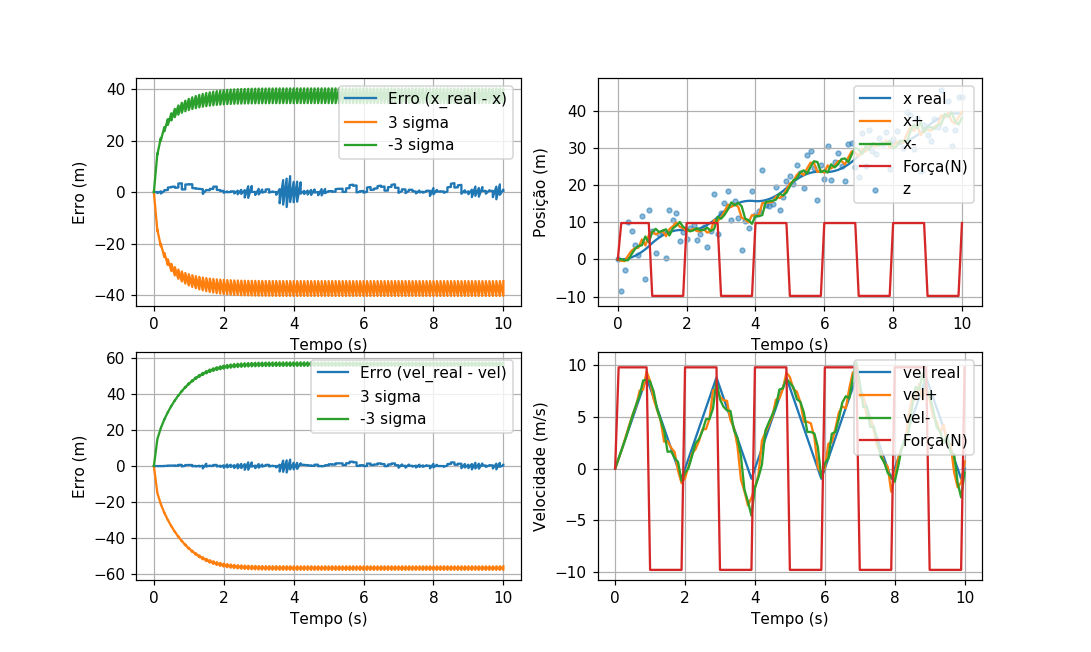

In [38]:
rodaFiltro(1)

[[25  0]
 [ 0 25]]


<IPython.core.display.Javascript object>


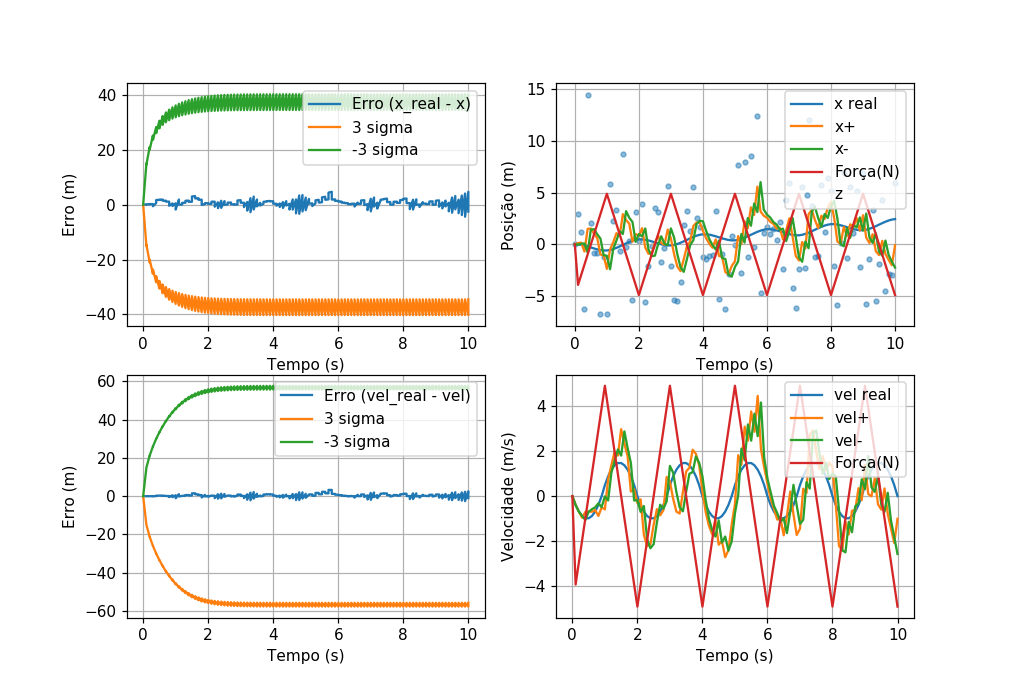

In [39]:
rodaFiltro(2)

In [ ]:
%matplotlib notebook
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

g = 9.8
kb = 1
m = 1
uref = href*np.sqrt(m*g/kb)


t = np.linspace(0, 2*pi, 100)
dt = t[1] - t[0]

# position
x = 2*cos(t)
y = sin(2*t)

# velocity
dxdt = -2*sin(t)
dydt = 2*cos(2*t)

# accel
d2xdt2 = -2*cos(t)
d2ydt2 = -4*sin(2*t)

# jerk
d3xdt3 = 2*sin(t)
d3ydt3 = -8*cos(2*t)

def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))

def g(x_antigo, href):
    # Estou usando aqui o deslocamento a partir de Href, positivo ou negativo
    # A princípio o objetivo é deixar parado em Href
    x = np.array([[0],[0]])
    uref = href*np.sqrt(m*g/kb)
    x[0,0] = x_antigo[0,0] + x_antigo
    
    
    

def rodaFiltro(modo = 0):
    M = 1  # kg
    D_tra = 2 # Desvio padrão do ruído de transição
    D_obs = 5 # Desvio padrão do ruído de observação

    x_real = np.array([[0],[0]])

    imax = 100
    i = 0
    dt = 0.1

    R = covariance2d(D_obs, D_obs)
    print(R)
    Q = D_obs*D_obs*20




    # Equação de medida z(k) = x(k) + v(k)
    while(i < imax):
        i = i+1
        
        if modo == 0:
            F = 9.8 # N
        elif(modo == 1):
            if (int(i*dt)%2)==0:
                F = 9.8
            else:
                F = -9.8
        else:
            if (int(i*dt)%2)==0:
                F = 9.8*(i*dt%2) - 9.8/2
            else:
                F = 9.8*(-i*dt%2) - 9.8/2

        # Atualiza a física do sistema
        x_real = np.asarray([[x_real[0][0]+x_real[1][0]*dt] , [x_real[1][0]+(F/M)*dt]])
        ruido_observacao = np.random.normal(0,D_obs,1)

        # Faz medição
        z = x_real[0][0] + ruido_observacao

        # Propagação
        x_pred = A @ x + B * F
        P_pred = A @ P @ A.T + R

        # Atualização
        K = P_pred @ C.T @ np.linalg.inv(C @ P_pred @ C.T + Q)
        x = x_pred + K @ (z - C @ x_pred)
        P = (np.identity(len(K)) - K @ C) @ P_pred


    fig, axs = plt.subplots(2, 2)

    axs[0, 0].plot(i_,erro_x_, label="Erro (x_real - x)")
    axs[0, 0].plot(i_,-3*np.asarray(P_x), label="3 sigma")
    axs[0, 0].plot(i_,3*np.asarray(P_x), label="-3 sigma")
    axs[0, 0].set_xlabel('Tempo (s)')
    axs[0, 0].set_ylabel('Erro (m)')
    axs[0, 0].legend(loc="upper right")
    axs[0, 0].grid(True)

    axs[0, 1].plot(t_, x_real_, label="x real")
    axs[0, 1].plot(t_, x_p, label="x+")
    axs[0, 1].plot(t_, x_m, label="x-")
    axs[0, 1].plot(t_, f_, label="Força(N)")
    axs[0, 1].scatter(t_, z_, label="z", alpha=0.5, s=10)
    axs[0, 1].set_xlabel('Tempo (s)')
    axs[0, 1].set_ylabel('Posição (m)')
    axs[0, 1].legend(loc="upper right")
    axs[0, 1].grid(True)

    axs[1, 0].plot(i_,erro_vel_, label="Erro (vel_real - vel)")
    axs[1, 0].plot(i_,-3*np.asarray(P_vel), label="3 sigma")
    axs[1, 0].plot(i_,3*np.asarray(P_vel), label="-3 sigma")
    axs[1, 0].set_xlabel('Tempo (s)')
    axs[1, 0].set_ylabel('Erro (m)')
    axs[1, 0].legend(loc="upper right")
    axs[1, 0].grid(True)

    axs[1, 1].plot(t_, vel_real_, label="vel real")
    axs[1, 1].plot(t_, vel_p, label="vel+")
    axs[1, 1].plot(t_, vel_m, label="vel-")
    axs[1, 1].plot(t_, f_, label="Força(N)")
    axs[1, 1].set_xlabel('Tempo (s)')
    
    axs[1, 1].set_ylabel('Velocidade (m/s)')
    axs[1, 1].legend(loc="upper right")
    axs[1, 1].grid(True)
